In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Copy of Copy of IVTU HOUSING DATA (updated) - 1993-2023.csv")

In [3]:
df.head()

,YEAR,STREET #,STREET NAME,# OF UNITS,UNIT #,PROPERTY TYPE,BEDROOM,BATHROOM,MONTHLY RENT ($),SECURITY ($),LEASOR,MAX # of TENANTS,FURNISHED (Y/P/N),WATER (Y/N),TRASH (Y/N),GAS (Y/N),ELECTRIC (Y/N),YARD (Y/N),CABLE (Y/N)
0,1993,6527,EL GRECO,NaN,NaN,NaN,2.0,0,$450.00,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,6505,PARDALL,NaN,NaN,NaN,2.0,2,$450.00,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,6639,PICASSO,NaN,NaN,NaN,2.0,1,$450.00,$200.00,SFMVDM,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,6589,PICASSO,NaN,NaN,NaN,2.0,1,$450.00,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1993,6559,SABADO TARDE,NaN,NaN,NaN,2.0,1,$450.00,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df = df.drop(columns = ['YEAR', 'Unnamed: 14', 'Unnamed: 15', 'CPI'], axis = 1)
df['MONTHLY RENT ($)'] = pd.to_numeric(df['MONTHLY RENT ($)'].str.replace(',','').str.replace('$',''), downcast = "float")
# df['SECURITY ($) NORMALIZED'] = pd.to_numeric(df['SECURITY ($) NORMALIZED'].str.replace(',',''), downcast = "float")
df.head()

,YEAR,STREET #,STREET NAME,# OF UNITS,UNIT #,PROPERTY TYPE,BEDROOM,BATHROOM,MONTHLY RENT ($),SECURITY ($),LEASOR,MAX # of TENANTS,FURNISHED (Y/P/N),WATER (Y/N),TRASH (Y/N),GAS (Y/N),ELECTRIC (Y/N),YARD (Y/N),CABLE (Y/N)
0,1993,6527,EL GRECO,NaN,NaN,NaN,2.0,0,450.0,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,6505,PARDALL,NaN,NaN,NaN,2.0,2,450.0,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,6639,PICASSO,NaN,NaN,NaN,2.0,1,450.0,$200.00,SFMVDM,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,6589,PICASSO,NaN,NaN,NaN,2.0,1,450.0,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1993,6559,SABADO TARDE,NaN,NaN,NaN,2.0,1,450.0,$200.00,SFMVDM,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
# ENCODING IN PROGRESS: df_encoded = 

In [5]:
cluster1 = df[['BEDROOM', 'BATHROOM', 'MONTHLY RENT ($)']]
cluster1

,BEDROOM,BATHROOM,MONTHLY RENT ($)
0,2.0,0,450.0
1,2.0,2,450.0
2,2.0,1,450.0
3,2.0,1,450.0
4,2.0,1,450.0
...,...,...,...
903,4.0,2,7134.0
904,2.0,2,2640.0
905,2.0,1,2600.0
906,2.0,2,3200.0


In [6]:
cluster1 = cluster1.groupby(['BEDROOM', 'BATHROOM'])
cluster1.head(10)

,BEDROOM,BATHROOM,MONTHLY RENT ($)
0,2.0,0,450.0
1,2.0,2,450.0
2,2.0,1,450.0
3,2.0,1,450.0
4,2.0,1,450.0
...,...,...,...
883,4.0,3,12250.0
888,6.0,4,17750.0
889,6.0,4,17000.0
897,7.0,3,16750.0


In [7]:
cluster1 = cluster1.mean(numeric_only = True)
cluster1.head(20)

MONTHLY RENT ($)
BEDROOM BATHROOM                  
0.0     1               877.542358
        2               450.000000
1.0     1               866.015625
        1.5             920.000000
1.5     1               700.000000
2.0     0               450.000000
        1              1459.730713
        1+             1400.000000
        1.5            2070.073486
        2              1842.319580
3.0     1              1612.407349
        1.5            1742.083374
        2              2764.191895
        2.5            2413.333252
        3              2953.666748
        4              3120.000000
4.0     1              1572.500000
        2              4918.966797
        2.5            2946.000000
        3              6048.333496

In [8]:
clustermat1 = cluster1.unstack(level = "BATHROOM")
clustermat1

MONTHLY RENT ($)                                                 \
BATHROOM                0            1      1+          1.5            2   
BEDROOM                                                                    
0.0                   NaN   877.542358     NaN          NaN   450.000000   
1.0                   NaN   866.015625     NaN   920.000000          NaN   
1.5                   NaN   700.000000     NaN          NaN          NaN   
2.0                 450.0  1459.730713  1400.0  2070.073486  1842.319580   
3.0                   NaN  1612.407349     NaN  1742.083374  2764.191895   
4.0                   NaN  1572.500000     NaN          NaN  4918.966797   
5.0                   NaN          NaN     NaN          NaN  5114.117676   
6.0                   NaN          NaN     NaN          NaN          NaN   
7.0                   NaN          NaN     NaN          NaN          NaN   
8.0                   NaN          NaN     NaN          NaN          NaN   
9.0                   NaN          NaN     NaN          NaN          NaN   

                                                               
BATHROOM           2.5             3     3.5        4     4.5  
BEDROOM                                                        
0.0                NaN           NaN     NaN      NaN     NaN  
1.0                NaN           NaN     NaN      NaN     NaN  
1.5                NaN           NaN     NaN      NaN     NaN  
2.0                NaN           NaN     NaN      NaN     NaN  
3.0        2413.333252   2953.666748     NaN   3120.0     NaN  
4.0        2946.000000   6048.333496  4050.0      NaN     NaN  
5.0        2500.000000   4203.428711  2800.0      NaN  4150.0  
6.0       17000.000000   4200.000000     NaN  17375.0     NaN  
7.0                NaN  16750.000000     NaN      NaN     NaN  
8.0                NaN           NaN     NaN    435.0     NaN  
9.0                NaN    435.000000     NaN      NaN     NaN

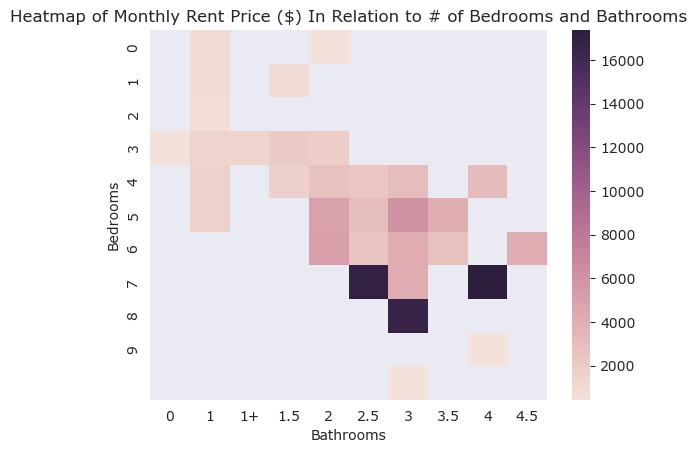

In [9]:
cmap = sns.cubehelix_palette(as_cmap = True, light = .9)
cmap.set_under(".5")
bathroom_labels = [0,1,'1+',1.5,2,2.5,3,3.5,4,4.5]
bedroom_labels = [0,1,2,3,4,5,6,7,8,9]
with sns.axes_style('dark'):
    heatmap1 = sns.heatmap(clustermat1, cmap = cmap, mask = clustermat1.isnull(),
               xticklabels = bathroom_labels, yticklabels = bedroom_labels)
plt.title('Heatmap of Monthly Rent Price ($) In Relation to # of Bedrooms and Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')

plt.show()

In [10]:
cluster2 = df[['YEAR', 'BEDROOM', 'MONTHLY RENT ($)']]
cluster2

,YEAR,BEDROOM,MONTHLY RENT ($)
0,1993,2.0,450.0
1,1993,2.0,450.0
2,1993,2.0,450.0
3,1993,2.0,450.0
4,1993,2.0,450.0
...,...,...,...
903,2023,4.0,7134.0
904,2023,2.0,2640.0
905,2023,2.0,2600.0
906,2023,2.0,3200.0


In [11]:
cluster2 = cluster2.groupby(['YEAR', 'BEDROOM'])
cluster2.head(10)

,YEAR,BEDROOM,MONTHLY RENT ($)
0,1993,2.0,450.0
1,1993,2.0,450.0
2,1993,2.0,450.0
3,1993,2.0,450.0
4,1993,2.0,450.0
...,...,...,...
898,2023,6.0,17000.0
899,2023,3.0,8500.0
900,2023,3.0,8000.0
903,2023,4.0,7134.0


In [12]:
cluster2 = cluster2.mean(numeric_only = True)
cluster2.head(30)

MONTHLY RENT ($)
YEAR BEDROOM                  
1993 2.0            456.250000
     3.0           1000.000000
1995 0.0            529.107117
     1.0            627.961975
     1.5            700.000000
     2.0           1155.216553
     3.0           1812.243774
     4.0           2276.923096
     5.0           2733.199951
     6.0           4200.000000
     8.0            435.000000
     9.0            435.000000
2000 0.0            866.000000
     1.0            948.048767
     2.0           1723.081421
     3.0           2767.894775
     4.0           3550.000000
2002 1.0            983.750000
     2.0           1650.000000
2009 0.0           1200.000000
     1.0           1300.000000
     2.0           2680.000000
     3.0           5166.666504
     4.0           4500.000000
2019 0.0           1128.750000
     1.0           1396.428589
     2.0           2640.909180
     3.0           4040.000000
     4.0           4800.000000
     5.0           5300.000000

In [13]:
clustermat2 = cluster2.unstack(level = "BEDROOM")
clustermat2

MONTHLY RENT ($)                                                \
BEDROOM              0.0          1.0    1.5          2.0          3.0   
YEAR                                                                     
1993                 NaN          NaN    NaN   456.250000  1000.000000   
1995          529.107117   627.961975  700.0  1155.216553  1812.243774   
2000          866.000000   948.048767    NaN  1723.081421  2767.894775   
2002                 NaN   983.750000    NaN  1650.000000          NaN   
2009         1200.000000  1300.000000    NaN  2680.000000  5166.666504   
2019         1128.750000  1396.428589    NaN  2640.909180  4040.000000   
2020         1157.777832  1482.142822    NaN  2759.090820  3918.750000   
2021         1381.111084  1660.555542    NaN  2934.000000  4383.333496   
2023                 NaN  3000.000000    NaN  4952.000000  7179.500000   

                                                                     
BEDROOM           4.0           5.0      6.0      7.0    8.0    9.0  
YEAR                                                                 
1993              NaN           NaN      NaN      NaN    NaN    NaN  
1995      2276.923096   2733.199951   4200.0      NaN  435.0  435.0  
2000      3550.000000           NaN      NaN      NaN    NaN    NaN  
2002              NaN           NaN      NaN      NaN    NaN    NaN  
2009      4500.000000           NaN      NaN      NaN    NaN    NaN  
2019      4800.000000   5300.000000      NaN      NaN    NaN    NaN  
2020      5533.333496   5350.000000      NaN      NaN    NaN    NaN  
2021      5400.000000           NaN      NaN      NaN    NaN    NaN  
2023     10743.400391  12100.000000  17250.0  16750.0    NaN    NaN

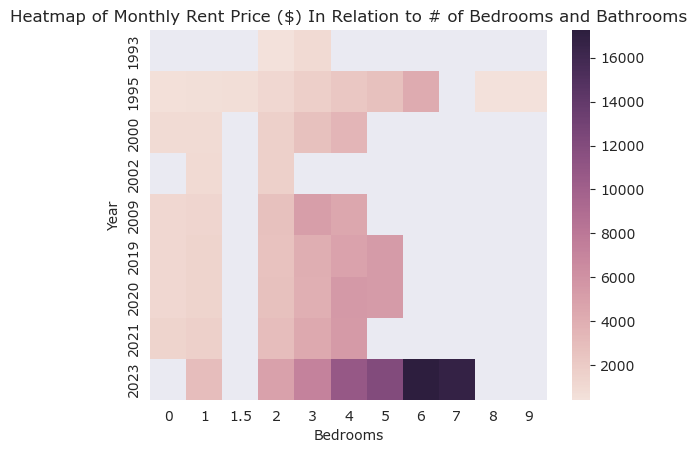

In [16]:
cmap = sns.cubehelix_palette(as_cmap = True, light = .9)
cmap.set_under(".5")
bedroom_labels = [0,1,1.5,2,3,4,5,6,7,8,9]
with sns.axes_style('dark'):
    heatmap1 = sns.heatmap(clustermat2, cmap = cmap, mask = clustermat2.isnull(),
                          xticklabels = bedroom_labels)
plt.title('Heatmap of Monthly Rent Price ($) In Relation to # of Bedrooms and Bathrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Year')

plt.show()